In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import os
import pickle
import random
import seaborn as sns
from tqdm import tqdm, tnrange
from time import time
from sklearn import preprocessing

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
DATASETS_PATH = "C:/Users/ernest.liu/Documents/git/Morphine-22-23/ML/Datasets/19-01-2023/"
os.chdir(DATASETS_PATH)
os.listdir()

['fall_simulation',
 'fall_simulation2',
 'fall_simulation3',
 'fall_simulation_2.csv',
 'fall_simulation_3.csv',
 'trial_data_1',
 'trial_data_1.csv',
 'trial_data_2',
 'trial_data_2.csv',
 'trial_data_3',
 'trial_data_3.csv',
 'trial_data_4',
 'trial_data_4.csv',
 'trial_data_5',
 'trial_data_5.csv']

In [3]:
adl_files = [file_name for file_name in os.listdir() if ".csv" in file_name and "trial" in file_name]
fall_files = [file_name for file_name in os.listdir() if ".csv" in file_name and "fall" in file_name]

print(adl_files)
print(fall_files)

['trial_data_1.csv', 'trial_data_2.csv', 'trial_data_3.csv', 'trial_data_4.csv', 'trial_data_5.csv']
['fall_simulation_2.csv', 'fall_simulation_3.csv']


In [4]:
trial_data_1 = pd.read_csv(DATASETS_PATH+'trial_data_1.csv').iloc[:,1:]
trial_data_2 = pd.read_csv(DATASETS_PATH+'trial_data_2.csv').iloc[:,1:]
trial_data_3 = pd.read_csv(DATASETS_PATH+'trial_data_3.csv').iloc[:,1:]
trial_data_4 = pd.read_csv(DATASETS_PATH+'trial_data_4.csv').iloc[:,1:]
trial_data_5 = pd.read_csv(DATASETS_PATH+'trial_data_5.csv').iloc[:,1:]

fall_simulation_2 = pd.read_csv(DATASETS_PATH+'fall_simulation_2.csv').iloc[:,1:]
fall_simulation_3 = pd.read_csv(DATASETS_PATH+'fall_simulation_3.csv').iloc[:,1:]

In [5]:
# Only take in accelerometer and gyroscope data
trial_data_1 = trial_data_1[['Ax','Ay','Az','gx','gy','gz']]
trial_data_2 = trial_data_2[['Ax','Ay','Az','gx','gy','gz']]
trial_data_3 = trial_data_3[['Ax','Ay','Az','gx','gy','gz']]
trial_data_4 = trial_data_4[['Ax','Ay','Az','gx','gy','gz']]
trial_data_5 = trial_data_5[['Ax','Ay','Az','gx','gy','gz']]

fall_simulation_2 = fall_simulation_2[['Ax','Ay','Az','gx','gy','gz']]
fall_simulation_3 = fall_simulation_3[['Ax','Ay','Az','gx','gy','gz']]

In [6]:
train_data = pd.concat([trial_data_1, trial_data_2, trial_data_3, trial_data_4, trial_data_5]).reset_index(drop=True)
test_data = pd.concat([fall_simulation_2, fall_simulation_3]).reset_index(drop=True)

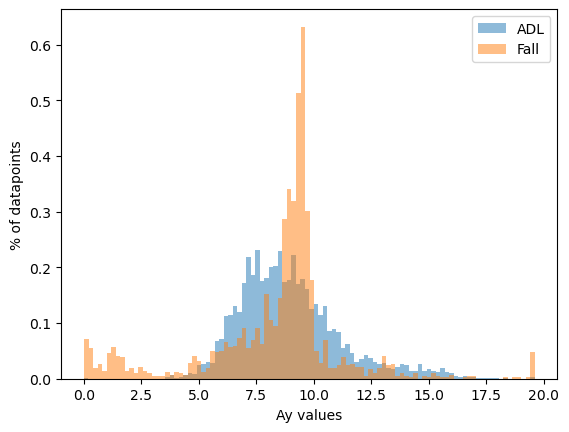

In [20]:
plt.hist(np.abs(train_data.Ay), bins=100, alpha=0.5, density=True, label = "ADL")
plt.hist(np.abs(test_data.Ay), bins=100, alpha=0.5, density=True, label = "Fall")
plt.ylabel("% of datapoints")
plt.xlabel("Ay values")
plt.legend()
plt.show()

In [8]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_data)

MinMaxScaler()

In [15]:
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

In [16]:
pca = PCA(n_components=3)
pca.fit(pd.concat([train_data, test_data]))

PCA(n_components=3)

In [17]:
print(pca.explained_variance_ratio_)

[0.30887181 0.28440145 0.20686177]


In [18]:
train_transformed = pca.transform(train_data_norm)
test_transformed = pca.transform(test_data_norm)